In [2]:
import pandas
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
water_data_before = pandas.read_csv('C:/Users/erjbr/datascience/data/Data_Krammersluis.csv')

In [4]:
water_data_before

,file_name,datetime,lock_movement,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
0,DVS1ZP_Converted/20200706_131712.txt,2020-07-06 13:17:12,closing,0,18.1,19.0,138.0,3044749.0
1,DVS1ZP_Converted/20200706_131853.txt,2020-07-06 13:18:53,closing,0,18.1,19.0,138.0,880237.0
2,DVS1ZP_Converted/20200706_160817.txt,2020-07-06 16:08:17,closing,0,18.5,202.0,138.0,6640.0
3,DVS1ZP_Converted/20200706_161710.txt,2020-07-06 16:17:10,closing,0,18.2,201.0,138.0,0.0
4,DVS1ZP_Converted/20200706_173238.txt,2020-07-06 17:32:38,opening,0,18.2,198.0,138.0,3795221.0
...,...,...,...,...,...,...,...,...
6609,DVS1ZP_Converted/20230815_045959.txt,2023-08-15 04:59:59,opening,1,8.8,92.0,124.0,2791437.0
6610,DVS1ZP_Converted/20230815_053835.txt,2023-08-15 05:38:35,closing,1,8.8,51.0,124.0,2192937.0
6611,DVS1ZP_Converted/20230815_064418.txt,2023-08-15 06:44:18,opening,1,8.8,-14.0,124.0,2629123.0
6612,DVS1ZP_Converted/20230815_070142.txt,2023-08-15 07:01:42,closing,1,8.8,-38.0,124.0,2155968.0


In [5]:
# Separating features and target
X = water_data_before['water_temperature_C'].values.reshape(-1, 1)
y = water_data_before['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 408301.4252820562
R-squared: -0.0009346444722642122


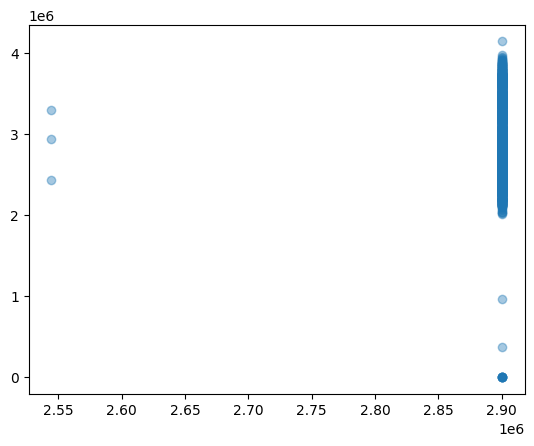

In [7]:
plot.scatter(y_pred, y_test, alpha=0.4)

In [18]:
water_data_after = pandas.read_csv('./cleaned_all.csv')

In [19]:
water_data_after

,file_name,datetime,lock_movement,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
0,DVS1ZP_Converted/20200706_131712.txt,2020-07-06 13:17:12,closing,0,18.1,19.0,13.8,3044749.0
1,DVS1ZP_Converted/20200706_173238.txt,2020-07-06 17:32:38,opening,0,18.2,198.0,13.8,3795221.0
2,DVS1ZP_Converted/20200706_190034.txt,2020-07-06 19:00:34,opening,0,18.7,73.0,13.8,3681963.0
3,DVS1ZP_Converted/20200706_202747.txt,2020-07-06 20:27:47,opening,0,18.5,-41.0,13.8,3563955.0
4,DVS1ZP_Converted/20200706_211903.txt,2020-07-06 21:19:03,opening,0,18.0,-97.0,13.8,3651022.0
...,...,...,...,...,...,...,...,...
6142,DVS1ZP_Converted/20230815_000205.txt,2023-08-15 00:02:05,opening,1,20.3,-14.0,12.4,2679450.0
6143,DVS1ZP_Converted/20230815_034130.txt,2023-08-15 03:41:30,opening,1,20.2,171.0,12.4,2680340.0
6144,DVS1ZP_Converted/20230815_045959.txt,2023-08-15 04:59:59,opening,1,20.1,92.0,12.4,2791437.0
6145,DVS1ZP_Converted/20230815_064418.txt,2023-08-15 06:44:18,opening,1,20.1,-14.0,12.4,2629123.0


In [30]:
# Separating features and target
X = water_data_after['water_temperature_C'].values.reshape(-1, 1)
y = water_data_after['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 367404.51856337674
R-squared: 0.05873101113148682


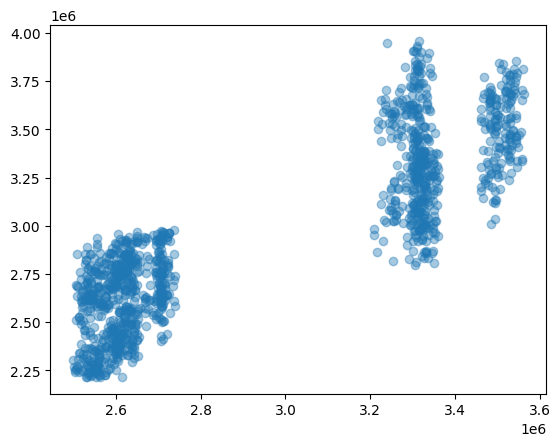

In [17]:
plot.scatter(y_pred, y_test, alpha=0.4)

In [13]:
all_water_data = pandas.read_csv('./cleaned_all.csv')

In [14]:
# Ensure we are only using numeric data
numeric_features = all_water_data.select_dtypes(include=[float, int]).columns
all_water_data = all_water_data[numeric_features]

# Assuming 'energy_usage' is the target column
X = all_water_data.drop(['energy_proxy'], axis=1)
y = all_water_data['energy_proxy']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C
0,0,18.1,19.0,13.8
1,0,18.2,198.0,13.8
2,0,18.7,73.0,13.8
3,0,18.5,-41.0,13.8
4,0,18.0,-97.0,13.8
...,...,...,...,...
6142,1,20.3,-14.0,12.4
6143,1,20.2,171.0,12.4
6144,1,20.1,92.0,12.4
6145,1,20.1,-14.0,12.4


In [15]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 185089.72855682275
R-squared: 0.7552144960340116


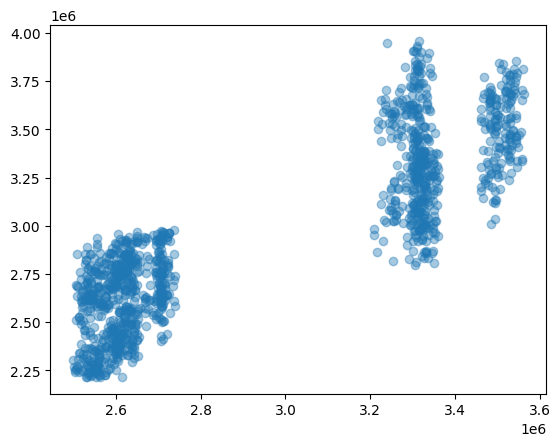

In [16]:
plot.scatter(y_pred, y_test, alpha=0.4)